<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/Tarea_20_Ejercicios_de_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Enlace GitHub](https://github.com/GustavoHDLC1/Colab_Files_PADP/blob/main/Tarea_20_Ejercicios_de_Normalizacion.ipynb)

Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
2. ¿Qué interpretas del p-valor antes y después de la normalización?


In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats
from sklearn.datasets import load_wine

In [2]:
def prueba_normalidad(data, columna):
    stat, p_val = shapiro(data)
    print(f"Prueba Normalidad (Shapiro) ({columna}): stat={stat:.4f}, p={p_val:.4f}")

    if p_val > 0.05:
        print("Los datos parecen seguir una distribución normal (no se rechaza H0).")
    else:
        print("Los datos no siguen una distribución normal (se rechaza H0).")

    return stat, p_val


In [3]:
# 1.- Cargar el dataset wine desde sklearn.
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
# 2.- Seleccionar una de las características numéricas
columna = 'alcohol'
data = df[[columna]]

In [5]:
# 3. Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
stat, p_value = prueba_normalidad(data, columna)

Prueba Normalidad (Shapiro) (alcohol): stat=0.9818, p=0.0200
Los datos no siguen una distribución normal (se rechaza H0).


In [6]:
# 4. Aplicar la normalización Min-Max a los datos seleccionados.
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)
data_norm = pd.DataFrame(data_norm, columns=[columna])

In [7]:
# 5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
stat, p_value = prueba_normalidad(data_norm, columna)

Prueba Normalidad (Shapiro) (alcohol): stat=0.9818, p=0.0200
Los datos no siguen una distribución normal (se rechaza H0).


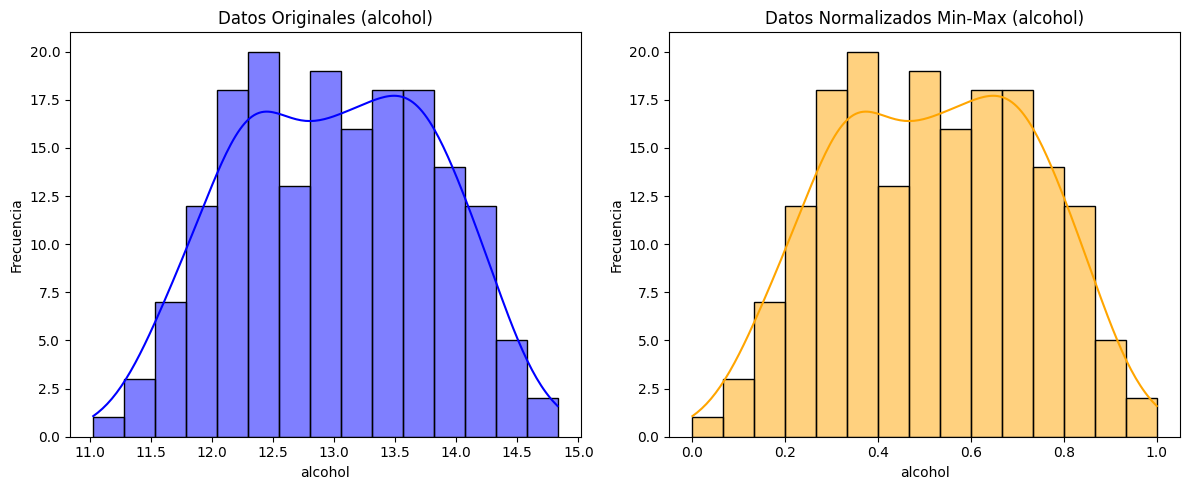

In [8]:
# 6. Graficar los datos originales y los normalizados utilizando matplotlib o seaborn
plt.figure(figsize=(12,5))

# Datos originales
plt.subplot(1,2,1)
sns.histplot(data[columna], kde=True, color='blue', bins=15)
plt.title(f'Datos Originales ({columna})')
plt.xlabel(columna)
plt.ylabel('Frecuencia')

# Datos normalizados
plt.subplot(1,2,2)
sns.histplot(data_norm[columna], kde=True, color='orange', bins=15)
plt.title(f'Datos Normalizados Min-Max ({columna})')
plt.xlabel(columna)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

¿Cómo afectó la normalización Min-Max a la distribución de los datos? \
En este caso, solo cambio la escala de los valores, pero la distribución es la misma \
¿Qué interpretas del p-valor antes y después de la normalización? \
Los resultados son exactamente los mismos, ya que la distribución no se vio afectada, solo se reescalaron los valores, pero no genera ningún cambio adicional

# Ejercicio 2: Normalización Z-Score

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?
2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?



In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# 1.- Cargar el dataset wine desde sklearn.
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [11]:
# 2.- Seleccionar una de las características numéricas (por ejemplo, malic_acid)
columna = 'malic_acid'
data = df[[columna]]

In [12]:
# 3. Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
stat, p_value = prueba_normalidad(data, columna)

Prueba Normalidad (Shapiro) (malic_acid): stat=0.8888, p=0.0000
Los datos no siguen una distribución normal (se rechaza H0).


In [13]:
# 4. Aplicar la normalización Z-Score a los datos seleccionados
scaler = StandardScaler()
data_zscore = scaler.fit_transform(data)
data_zscore = pd.DataFrame(data_zscore, columns=[columna])

In [14]:
# 5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
stat, p_value = prueba_normalidad(data_zscore, columna)

Prueba Normalidad (Shapiro) (malic_acid): stat=0.8888, p=0.0000
Los datos no siguen una distribución normal (se rechaza H0).


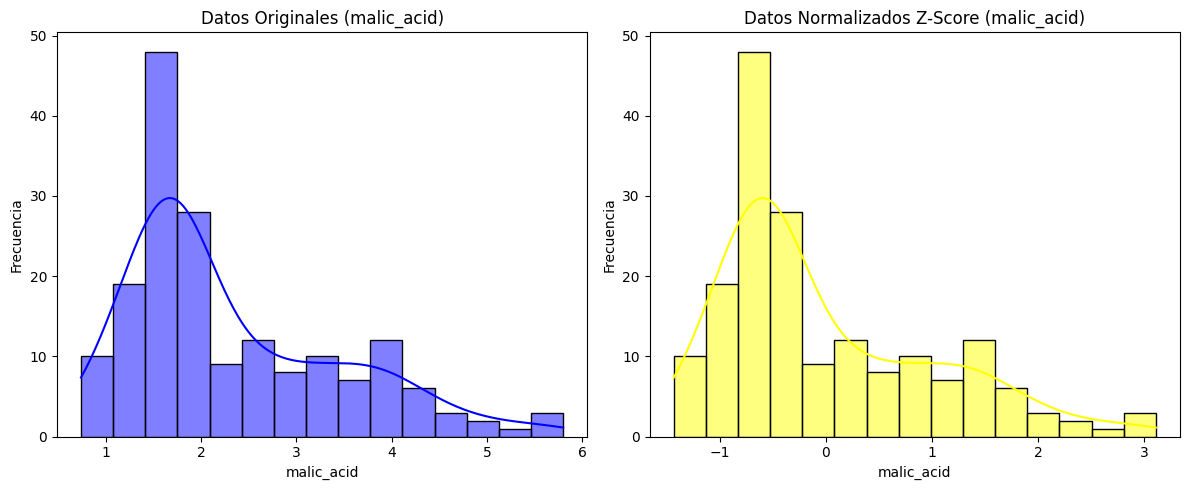

In [15]:
# 6. Graficar los datos originales y normalizados
plt.figure(figsize=(12,5))

# Datos originales
plt.subplot(1,2,1)
sns.histplot(data[columna], kde=True, color='blue', bins=15)
plt.title(f'Datos Originales ({columna})')
plt.xlabel(columna)
plt.ylabel('Frecuencia')

# Datos normalizados Z-Score
plt.subplot(1,2,2)
sns.histplot(data_zscore[columna], kde=True, color='yellow', bins=15)
plt.title(f'Datos Normalizados Z-Score ({columna})')
plt.xlabel(columna)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score? \
En este caso, solo se recorrieron de rango los valores, pero en esencia la distribución es la misma, no hubo cambios

¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos? \
Lo que hace este método es volver la media 0 y desviación estándar 1, por lo que los estadísticos descriptivos cambian en general, pero no afecta directamente la forma en que se distribuyen los datos

Ejercicio 3: Transformación Logarítmica
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?
2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?


In [16]:
# Generamos datos sintéticos (relación exponencial)
np.random.seed(42)
x = np.linspace(1, 10, 100)
y = np.exp(0.5 * x) * (1 + np.random.normal(scale=0.05, size=x.shape))  # ruido multiplicativo
y = np.clip(y, a_min=1e-6, a_max=None)  # garantiza que no haya valores negativos
df_y = pd.DataFrame(y, columns=['y'])

In [17]:
# 3. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
stat, p_value = prueba_normalidad(df_y, 'y')

Prueba Normalidad (Shapiro) (y): stat=0.7863, p=0.0000
Los datos no siguen una distribución normal (se rechaza H0).


In [18]:
# Aplicamos la transformación logarítmica a y
y_log = np.log(y)
data_log = pd.DataFrame(y_log, columns=['y_log'])

In [19]:
# 3. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
stat, p_value = prueba_normalidad(data_log, 'y_log')

Prueba Normalidad (Shapiro) (y_log): stat=0.9517, p=0.0011
Los datos no siguen una distribución normal (se rechaza H0).


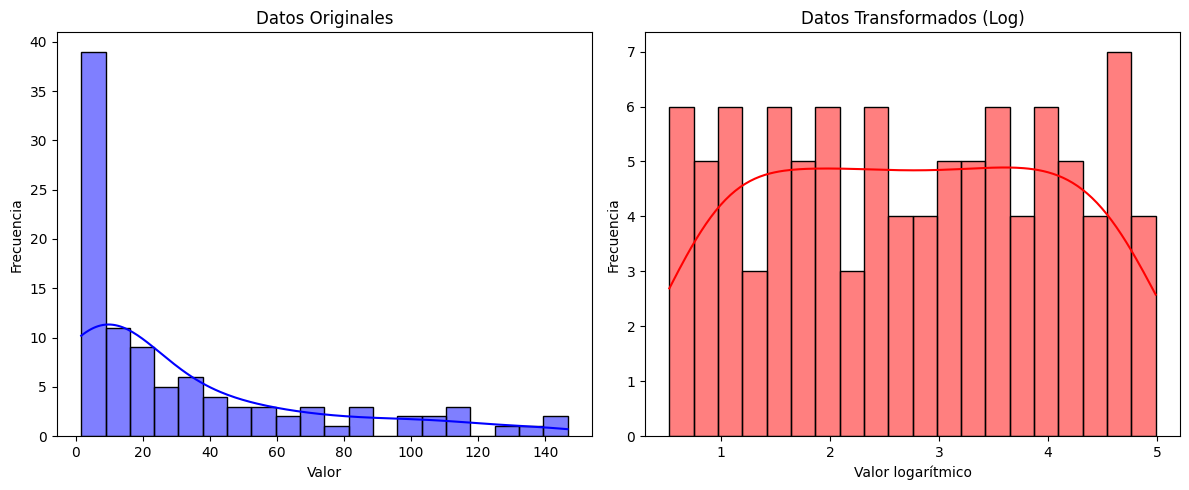

In [20]:
# 4. Graficar los datos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(y, kde=True, color='blue', bins=20)
plt.title("Datos Originales")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.subplot(1,2,2)
sns.histplot(y_log, kde=True, color='red', bins=20)
plt.title("Datos Transformados (Log)")
plt.xlabel("Valor logarítmico")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

¿Cómo afectó la transformación logarítmica a la distribución de los datos? \
Redujo de manera significativa el rango de la distribución, de modo que la asimetría ahora es menor y los datos están más comprimidos y mejor distribuidos \
¿Qué interpretas del p-valor antes y después de la transformación logarítmica? \
En este caso la distribución si se vio afectada y el valor del p_value aumentó después de la normalización, sin embargo, aun no se cumple con el supuesto, pero si se acerca más a lo buscado

Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?


In [21]:
# Generamos datos sintéticos (relación exponencial)
np.random.seed(42)
x = np.linspace(1, 10, 100)
y = np.exp(0.5 * x) * (1 + np.random.normal(scale=0.05, size=x.shape))  # ruido multiplicativo
y = np.clip(y, a_min=1e-6, a_max=None)  # garantiza que no haya valores negativos
df_y = pd.DataFrame(y, columns=['y'])

In [22]:
# Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
stat, p_value = prueba_normalidad(df_y, 'y')

Prueba Normalidad (Shapiro) (y): stat=0.7863, p=0.0000
Los datos no siguen una distribución normal (se rechaza H0).


In [23]:
# Aplicamos la transformación raíz cuadrada
Y_sqrt = np.sqrt(y)
df_ys = pd.DataFrame(y, columns=['y_sqrt'])

In [24]:
# 3. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
stat, p_value = prueba_normalidad(df_ys, 'y_sqrt')

Prueba Normalidad (Shapiro) (y_sqrt): stat=0.7863, p=0.0000
Los datos no siguen una distribución normal (se rechaza H0).


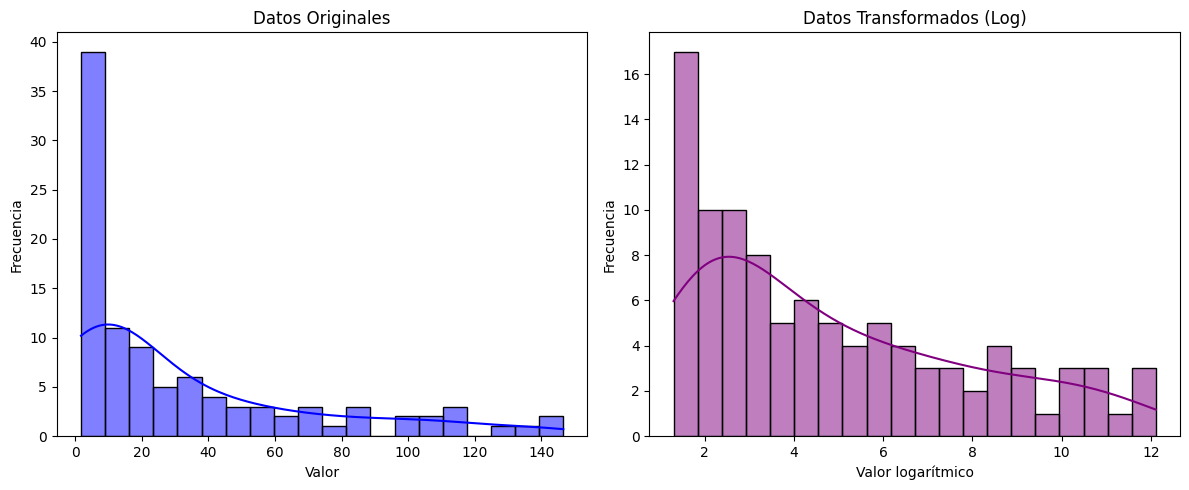

In [25]:
# 4. Graficar los datos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(y, kde=True, color='blue', bins=20)
plt.title("Datos Originales")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.subplot(1,2,2)
sns.histplot(Y_sqrt, kde=True, color='purple', bins=20)
plt.title("Datos Transformados (Log)")
plt.xlabel("Valor logarítmico")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos? \
Redujo el rango y se nota un ligero cambio en la distribución que se aprecia en la gráfica, aun que no es tan marcado como en el caso anterior \
 ¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos? \
 Lo que busca es reducir el sesgo en distribuciones cargadas a la derecha, por lo que en este caso no fue buena idea aplicar esta técnica, ya que los datos están cargados a la izquierda, por tanto no es muy efectiva

Ejercicio 5: Transformación Box-Cox
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?


In [26]:
from scipy.stats import boxcox

In [27]:
# Datos sesgados a la derecha
X = np.random.exponential(scale=2, size=1000)
df_x = pd.DataFrame(y, columns=['x'])

In [28]:
# Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
stat, p_value = prueba_normalidad(df_x, 'x')

Prueba Normalidad (Shapiro) (x): stat=0.7863, p=0.0000
Los datos no siguen una distribución normal (se rechaza H0).


In [29]:
# Aplicamos la transformación Box-Cox y obtenemos el valor óptimo de lambda
X_transformed, lambda_opt = boxcox(X)
df_xb = pd.DataFrame(X_transformed, columns=['x_box'])

In [30]:
print(lambda_opt)

0.23846315406412794


In [31]:
# Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
stat, p_value = prueba_normalidad(df_xb, 'x_box')

Prueba Normalidad (Shapiro) (x_box): stat=0.9955, p=0.0049
Los datos no siguen una distribución normal (se rechaza H0).


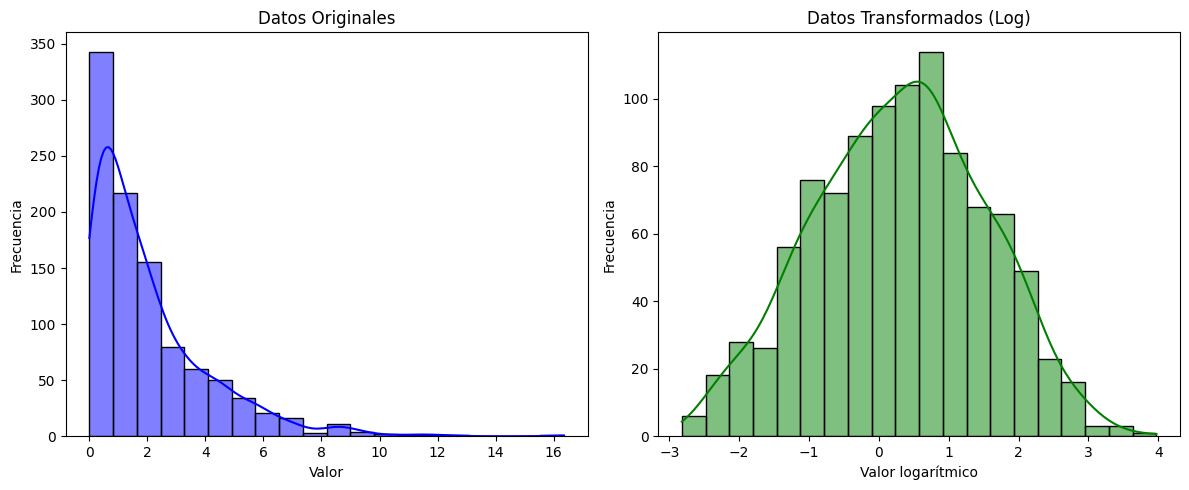

In [32]:
# 4. Graficar los datos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(X, kde=True, color='blue', bins=20)
plt.title("Datos Originales")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.subplot(1,2,2)
sns.histplot(X_transformed, kde=True, color='green', bins=20)
plt.title("Datos Transformados (Log)")
plt.xlabel("Valor logarítmico")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

¿Cómo afectó la transformación Box-Cox a la distribución de los datos? \
En este caso el cambio es bastante significativo, donde se pasó de una distribución cargada a la izquierda a una forma de campana \
¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?

El valor de lambda es de 0.25, por lo que se encuentra entre el valor para una transformación logarítmica y una raíz cuadrada, lo que indica que aplica una compresión menos agresiva que una transformación logaritmica pero mas efectiva que una raíz cuadrada.